#Etapa 4
Análisis de datos
(Explorar y entender los datos.)

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from wordcloud import WordCloud

In [2]:
df = pd.read_excel('Traslados Analisis General_anonimizado.xlsx')

In [3]:
# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

In [4]:
# 1. ESTADÍSTICAS DESCRIPTIVAS BÁSICAS
print("="*60)
print("ESTADÍSTICAS DESCRIPTIVAS GENERALES")
print("="*60)

# Información general del dataset
print(f"Dimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")
print("\nTipos de datos por columna:")
print(df.dtypes)
print("\nPrimeras 5 filas:")
display(df.head())

# Columnas disponibles
columnas = ['ID_Traslado', 'Fecha', 'Id_Anonizado', 'Diagnostico', 'Detalles',
            'EstablecimientoMedico', 'Vehiculos', 'Choferes', 'Destino']
print(f"\nColumnas disponibles: {columnas}")

ESTADÍSTICAS DESCRIPTIVAS GENERALES
Dimensiones del dataset: 922 filas y 9 columnas

Tipos de datos por columna:
ID_Traslado                       int64
Fecha                    datetime64[ns]
Id_Anonizado                     object
Diagnostico                      object
Detalles                         object
EstablecimientoMedico            object
Vehiculos                        object
Choferes                         object
Destino                          object
dtype: object

Primeras 5 filas:


,ID_Traslado,Fecha,Id_Anonizado,Diagnostico,Detalles,EstablecimientoMedico,Vehiculos,Choferes,Destino
0,1,2024-01-01,6d808370addfbfcc2606224e168fd5b0f2d36d5f1c6135...,Alta Médica,Fractura de Femur,Consultorio Particular,Amb Renault Kangoo Confort 1.6,Luna Cristian Exequiel,Sgo del Estero
1,2,2024-01-02,ab845bc40a414c5cb139d197f500499dbbc09bdc5da8d4...,Oncológico,Cancer de mamas,Sanatorio Norte,Amb Renault Kangoo Confort 1.6,Campos Daniel,Sgo del Estero
2,3,2024-01-02,290e8cfe5f814b3d64529caa4f6f96d7de581c1ac05d78...,Oncológico,Cancer de mamas,Sanatorio Norte,Amb Renault Kangoo Confort 1.6,Campos Daniel,Sgo del Estero
3,4,2024-01-02,d0dd178ac7db6ee3fbe9f62a60884fc46b900edbd53b93...,Diálisis,Insuf Renal,Hosp Regional Dr Ramón Carrillo,Amb Renault Kangoo Confort 1.6,Campos Daniel,Sgo del Estero
4,5,2024-01-02,281b3107bebc987666ba1759c842e1fa558081eed3de4f...,Oncológico,Cancer de Utero,Maternidad Ntra Sra de la Merced,Amb Renault Kangoo Confort 1.6,Luna Cristian Exequiel,San Miguel de Tucumán



Columnas disponibles: ['ID_Traslado', 'Fecha', 'Id_Anonizado', 'Diagnostico', 'Detalles', 'EstablecimientoMedico', 'Vehiculos', 'Choferes', 'Destino']


In [5]:
# Estadísticas descriptivas para variables numéricas (si existen)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if numeric_cols:
    print("\nEstadísticas descriptivas - Variables numéricas:")
    display(df[numeric_cols].describe())
else:
    print("\nNo hay variables numéricas en el dataset")

# Estadísticas para variables categóricas
print("\nEstadísticas descriptivas - Variables categóricas:")
categorical_cols = ['Diagnostico', 'Detalles', 'EstablecimientoMedico',
                   'Vehiculos', 'Choferes', 'Destino']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"Número de valores únicos: {df[col].nunique()}")
        print(f"Valores más frecuentes:")
        print(df[col].value_counts().head())


Estadísticas descriptivas - Variables numéricas:


,ID_Traslado
count,922.000000
mean,461.500000
std,266.302773
min,1.000000
25%,231.250000
50%,461.500000
75%,691.750000
max,922.000000



Estadísticas descriptivas - Variables categóricas:

Diagnostico:
Número de valores únicos: 18
Valores más frecuentes:
Diagnostico
Diálisis          296
Neurologico       180
Oncológico        135
Logística          83
Traumatológico     76
Name: count, dtype: int64

Detalles:
Número de valores únicos: 147
Valores más frecuentes:
Detalles
Insuf Renal                                   296
Cancer de mamas                                51
Cancer de Utero                                33
Tramitacion de medicacion para pensionados     29
Flebitis                                       29
Name: count, dtype: int64

EstablecimientoMedico:
Número de valores únicos: 26
Valores más frecuentes:
EstablecimientoMedico
Hosp Regional Dr Ramón Carrillo                          429
CePSI Eva Perón - Centro Provincial de Salud Infantil    163
I.P.R.I Inst Provincial de Rehabilitación                 72
Logística                                                 47
Tacse SRL - Centro de Diagnóstico de Alt

In [6]:
# 2. ANÁLISIS DE VALORES FALTANTES
print("\n" + "="*60)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*60)
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({
    'Valores faltantes': missing_data,
    'Porcentaje': missing_percent
})
display(missing_table[missing_table['Valores faltantes'] > 0])



ANÁLISIS DE VALORES FALTANTES


,Valores faltantes,Porcentaje
Detalles,7,0.759219
Vehiculos,49,5.314534


In [7]:
# 3. ANÁLISIS TEMPORAL (FECHAS)
print("\n" + "="*60)
print("ANÁLISIS TEMPORAL")
print("="*60)

# Convertir la columna Fecha a datetime si no lo está
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer componentes de fecha
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.day
df['Dia_Semana'] = df['Fecha'].dt.day_name()
df['Trimestre'] = df['Fecha'].dt.quarter


ANÁLISIS TEMPORAL


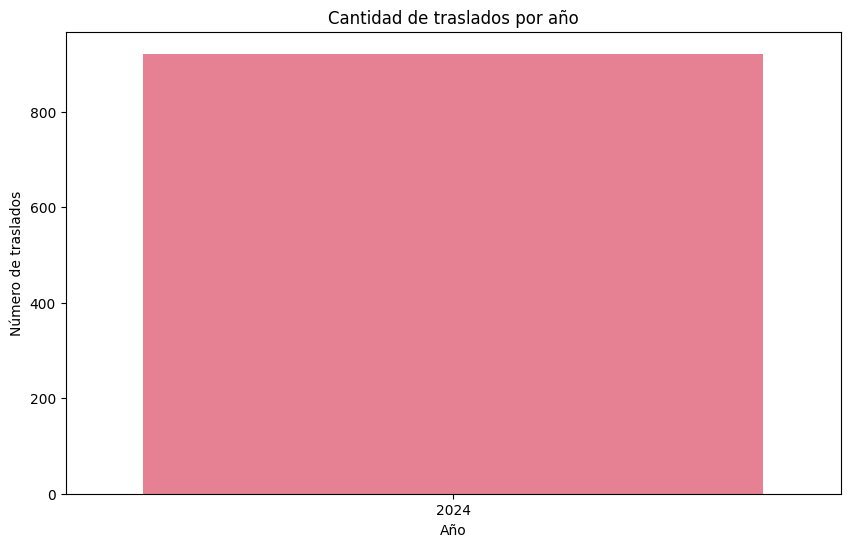

In [8]:
# Traslados por año
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Año')
plt.title('Cantidad de traslados por año')
plt.xlabel('Año')
plt.ylabel('Número de traslados')
plt.show()

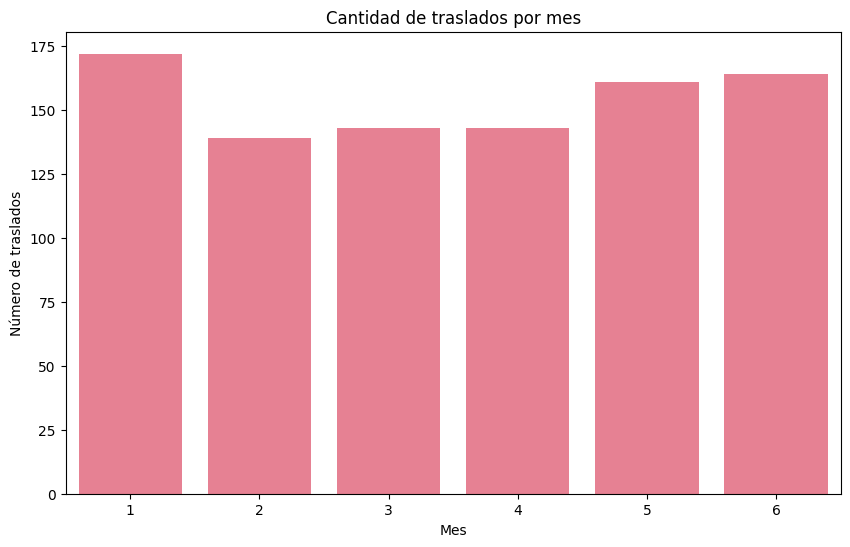

In [9]:
# Traslados por mes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mes')
plt.title('Cantidad de traslados por mes')
plt.xlabel('Mes')
plt.ylabel('Número de traslados')
plt.show()


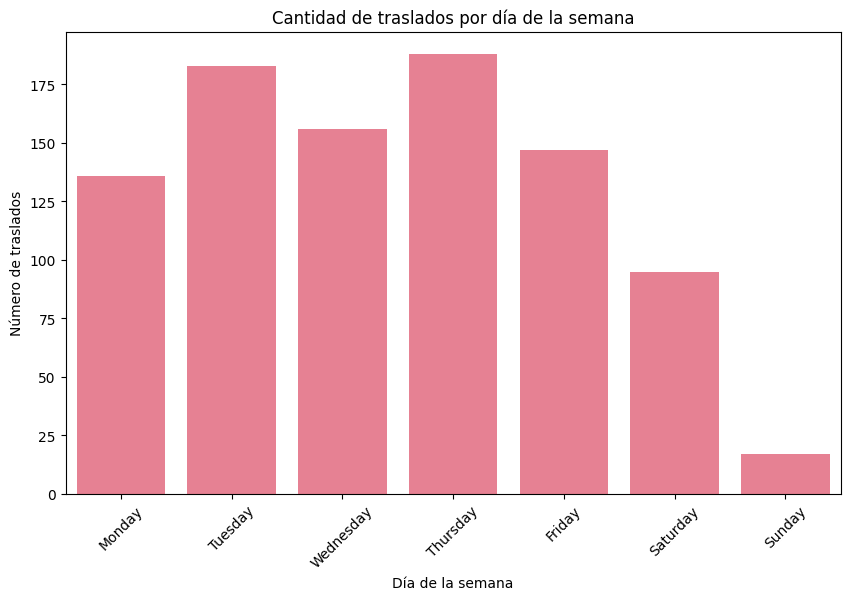

In [10]:
# Traslados por día de la semana
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dia_Semana',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Cantidad de traslados por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de traslados')
plt.xticks(rotation=45)
plt.show()

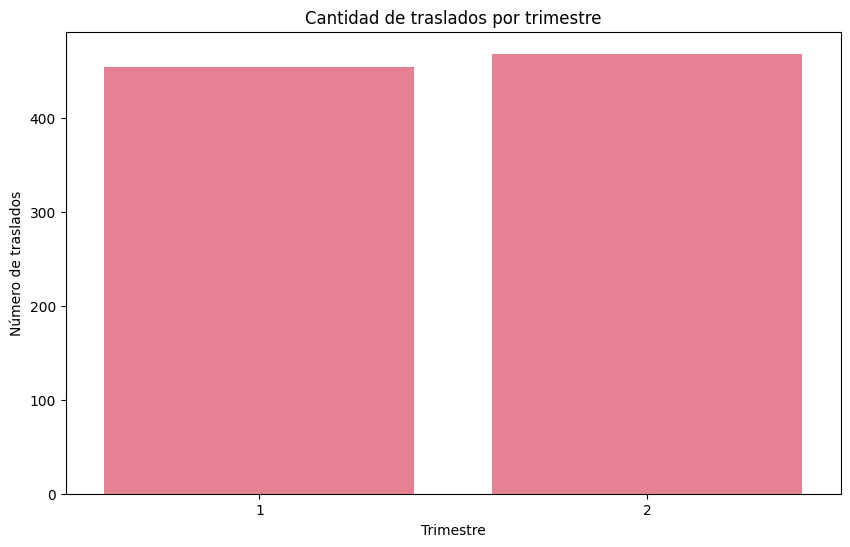

In [11]:
# Traslados por trimestre
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Trimestre')
plt.title('Cantidad de traslados por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Número de traslados')
plt.show()


ANÁLISIS DE DESTINOS Y ESTABLECIMIENTOS MÉDICOS


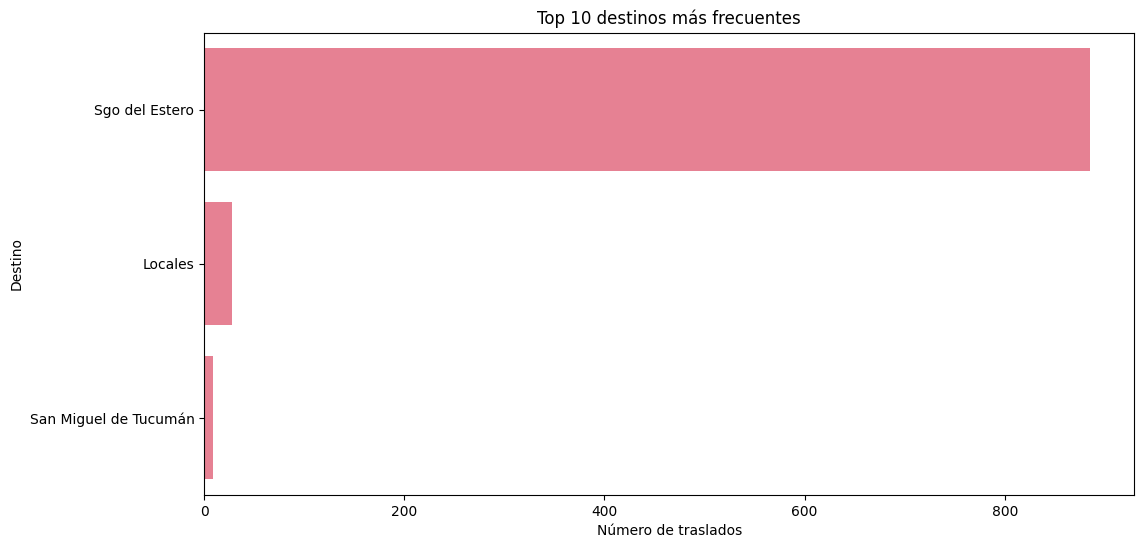

In [12]:
# 4. ANÁLISIS DE DESTINOS Y ESTABLECIMIENTOS MÉDICOS
print("\n" + "="*60)
print("ANÁLISIS DE DESTINOS Y ESTABLECIMIENTOS MÉDICOS")
print("="*60)

# Top 10 destinos más comunes
plt.figure(figsize=(12, 6))
destino_counts = df['Destino'].value_counts().head(10)
sns.barplot(x=destino_counts.values, y=destino_counts.index)
plt.title('Top 10 destinos más frecuentes')
plt.xlabel('Número de traslados')
plt.ylabel('Destino')
plt.show()


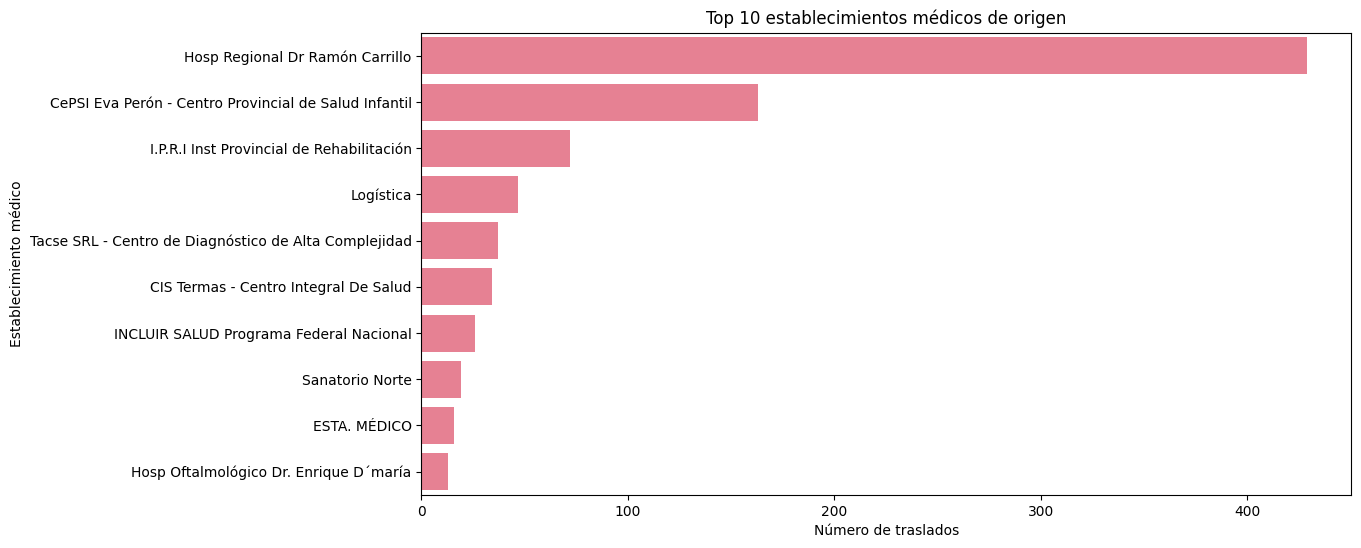

In [13]:
# Top 10 establecimientos médicos
plt.figure(figsize=(12, 6))
establecimiento_counts = df['EstablecimientoMedico'].value_counts().head(10)
sns.barplot(x=establecimiento_counts.values, y=establecimiento_counts.index)
plt.title('Top 10 establecimientos médicos de origen')
plt.xlabel('Número de traslados')
plt.ylabel('Establecimiento médico')
plt.show()


ANÁLISIS DE DIAGNÓSTICOS Y DETALLES


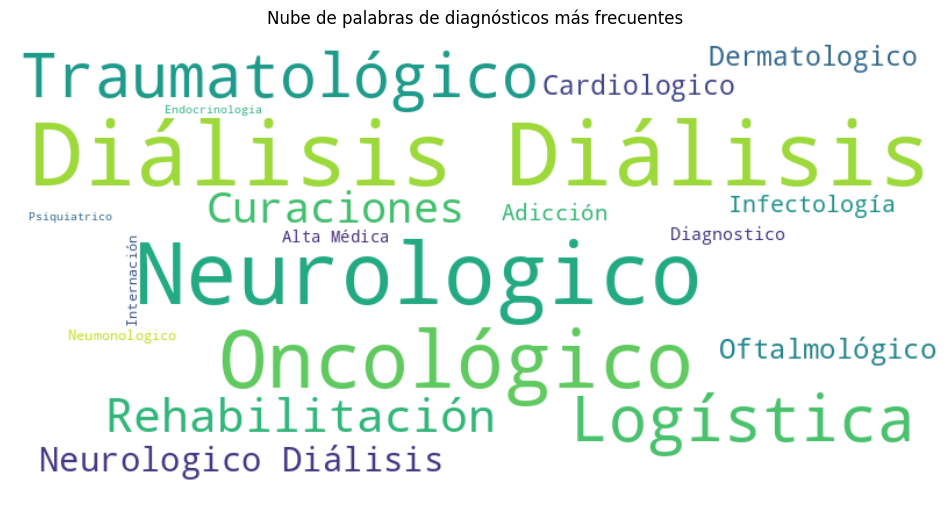

In [14]:
# 5. ANÁLISIS DE DIAGNÓSTICOS Y DETALLES
print("\n" + "="*60)
print("ANÁLISIS DE DIAGNÓSTICOS Y DETALLES")
print("="*60)

# Nube de palabras de diagnósticos
plt.figure(figsize=(12, 8))
text = ' '.join(str(diagnostico) for diagnostico in df['Diagnostico'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de diagnósticos más frecuentes')
plt.show()

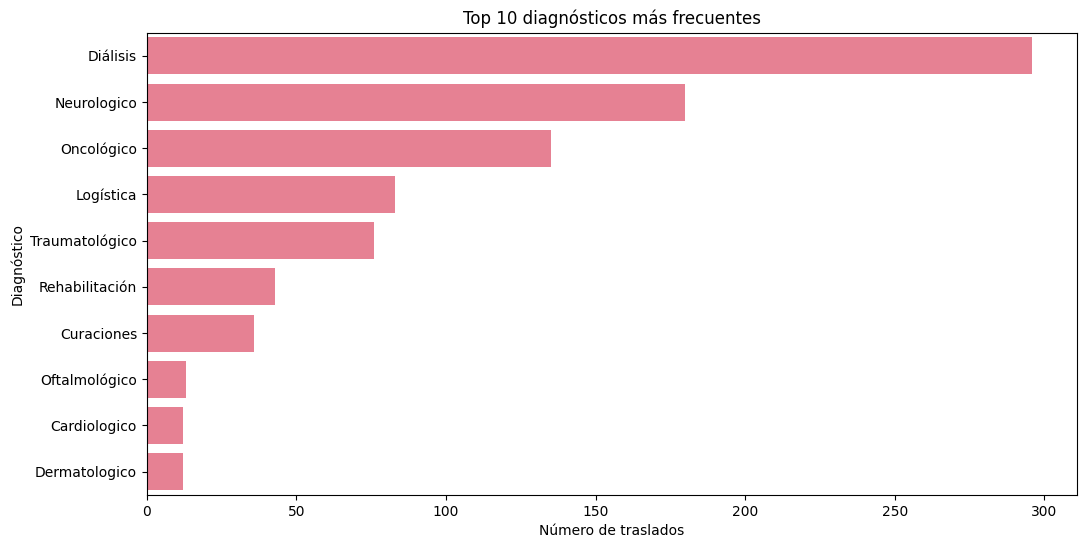

In [15]:
# Top 10 diagnósticos
plt.figure(figsize=(12, 6))
diagnostico_counts = df['Diagnostico'].value_counts().head(10)
sns.barplot(x=diagnostico_counts.values, y=diagnostico_counts.index)
plt.title('Top 10 diagnósticos más frecuentes')
plt.xlabel('Número de traslados')
plt.ylabel('Diagnóstico')
plt.show()


Análisis de detalles de traslados:


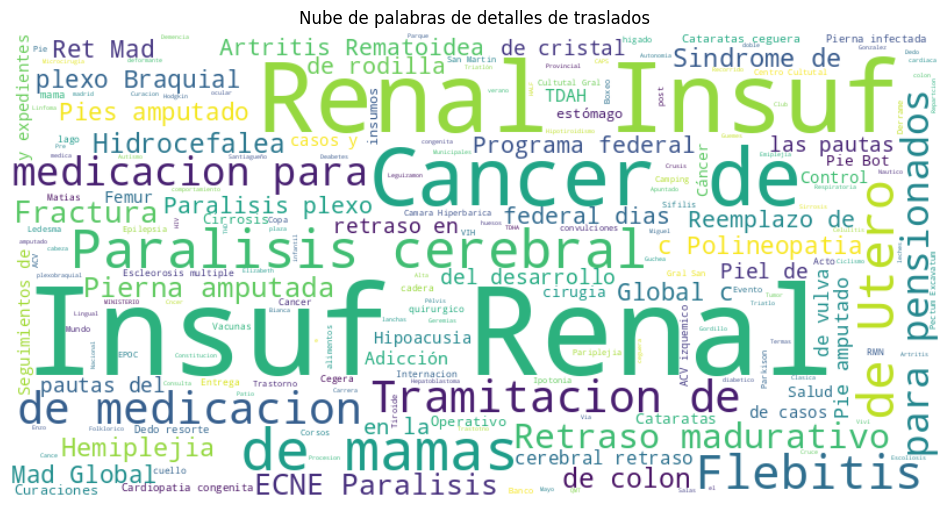

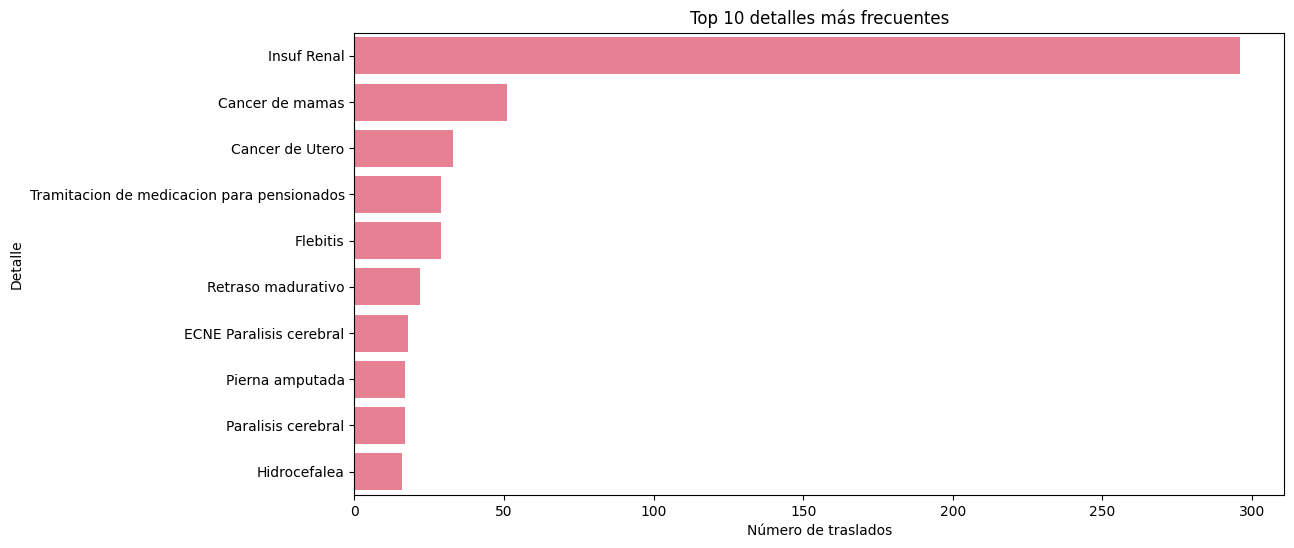

In [16]:
# Análisis de la columna Detalles
if 'Detalles' in df.columns and df['Detalles'].notna().sum() > 0:
    print("\nAnálisis de detalles de traslados:")
    # Nube de palabras de detalles
    plt.figure(figsize=(12, 8))
    text_detalles = ' '.join(str(detalle) for detalle in df['Detalles'].dropna())
    wordcloud_detalles = WordCloud(width=800, height=400, background_color='white').generate(text_detalles)
    plt.imshow(wordcloud_detalles, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de palabras de detalles de traslados')
    plt.show()

      # Top 10 detalles
    plt.figure(figsize=(12, 6))
    detalles_counts = df['Detalles'].value_counts().head(10)
    sns.barplot(x=detalles_counts.values, y=detalles_counts.index)
    plt.title('Top 10 detalles más frecuentes')
    plt.xlabel('Número de traslados')
    plt.ylabel('Detalle')
    plt.show()


ANÁLISIS DE VEHÍCULOS Y CHOFERES


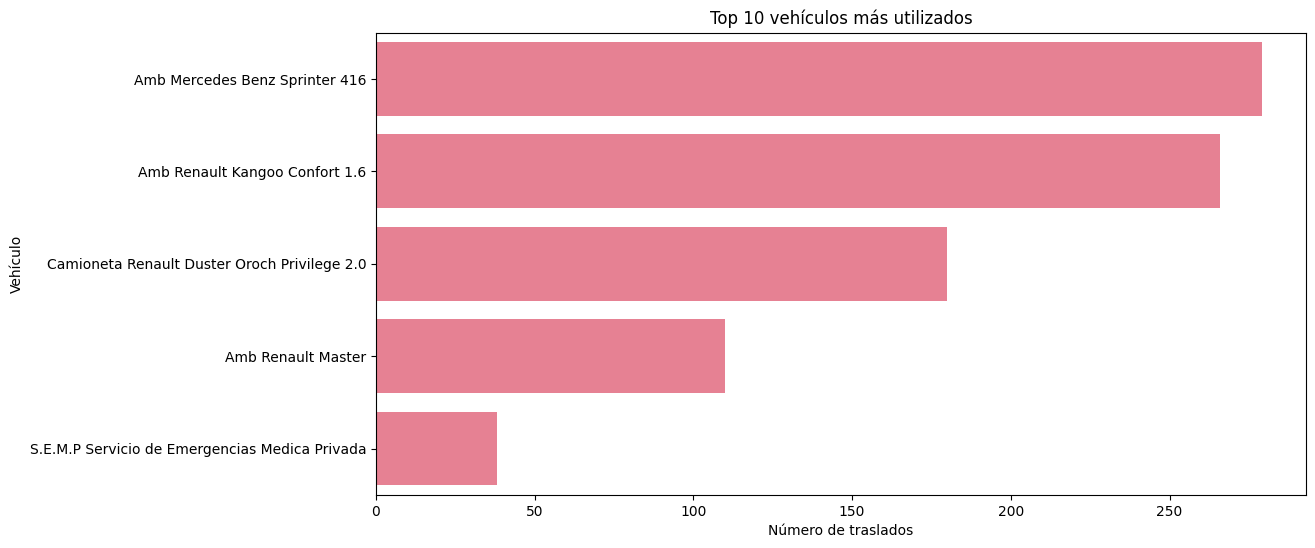

In [17]:
# 6. ANÁLISIS DE VEHÍCULOS Y CHOFERES
print("\n" + "="*60)
print("ANÁLISIS DE VEHÍCULOS Y CHOFERES")
print("="*60)

# Vehículos más utilizados
plt.figure(figsize=(12, 6))
vehiculo_counts = df['Vehiculos'].value_counts().head(10)
sns.barplot(x=vehiculo_counts.values, y=vehiculo_counts.index)
plt.title('Top 10 vehículos más utilizados')
plt.xlabel('Número de traslados')
plt.ylabel('Vehículo')
plt.show()

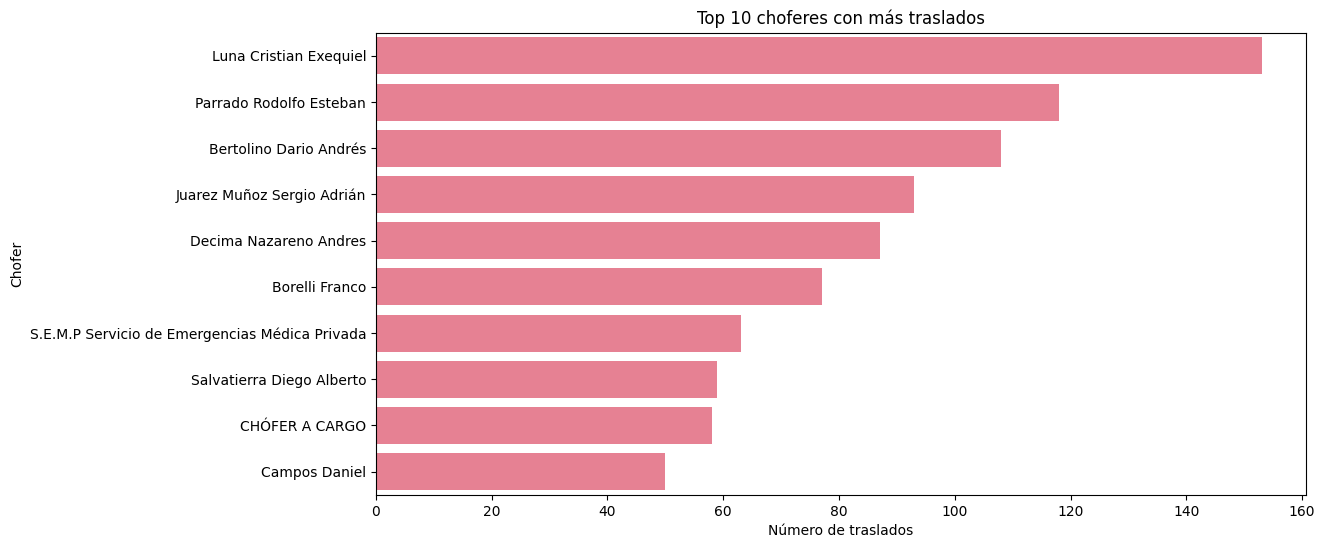

In [18]:
# Choferes más activos
plt.figure(figsize=(12, 6))
chofer_counts = df['Choferes'].value_counts().head(10)
sns.barplot(x=chofer_counts.values, y=chofer_counts.index)
plt.title('Top 10 choferes con más traslados')
plt.xlabel('Número de traslados')
plt.ylabel('Chofer')
plt.show()

In [19]:
# 8. ANÁLISIS DE PATRONES TEMPORALES AVANZADOS
print("\n" + "="*60)
print("ANÁLISIS DE PATRONES TEMPORALES AVANZADOS")
print("="*60)

# Evolución mensual de traslados
monthly_data = df.groupby(['Año', 'Mes']).size().reset_index(name='Conteo')
monthly_data['Fecha'] = pd.to_datetime(monthly_data['Año'].astype(str) + '-' + monthly_data['Mes'].astype(str))



ANÁLISIS DE PATRONES TEMPORALES AVANZADOS


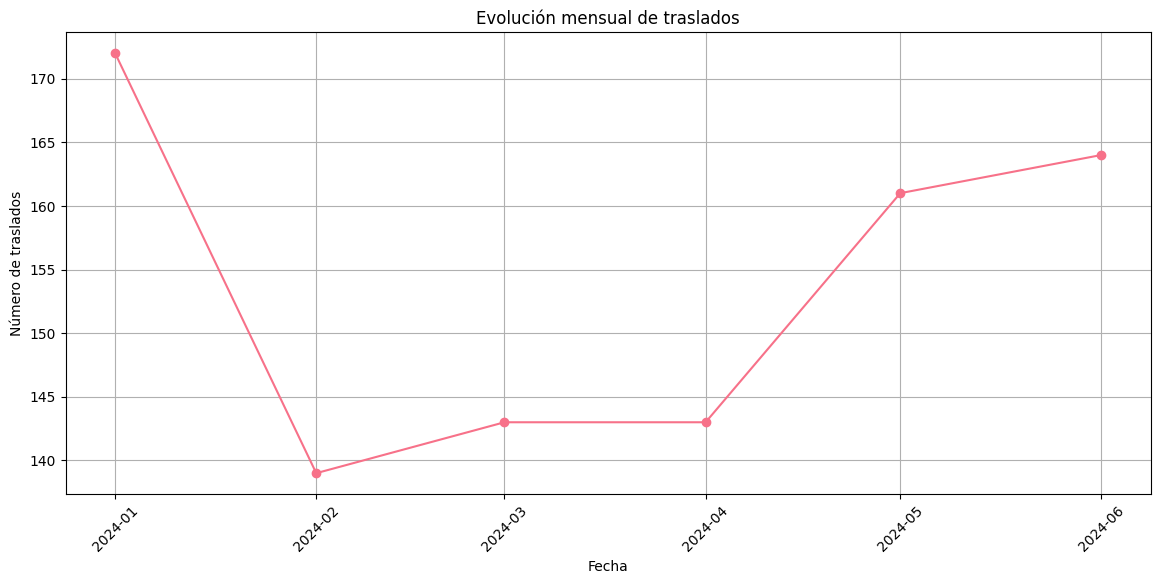

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_data['Fecha'], monthly_data['Conteo'], marker='o')
plt.title('Evolución mensual de traslados')
plt.xlabel('Fecha')
plt.ylabel('Número de traslados')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [21]:
# 9. IDENTIFICACIÓN DE PATRONES E INSIGHTS
print("\n" + "="*60)
print("INSIGHTS Y PATRONES IDENTIFICADOS")
print("="*60)

# Insight 1: Tendencia temporal
print("1. TENDENCIA TEMPORAL:")
monthly_trend = df.groupby(['Año', 'Mes']).size().reset_index(name='Conteo')
print(f"- Número total de traslados: {len(df)}")
print(f"- Período de tiempo cubierto: {df['Fecha'].min().date()} a {df['Fecha'].max().date()}")
if len(monthly_trend) > 0:
    max_idx = monthly_trend['Conteo'].idxmax()
    print(f"- Mes con más traslados: {monthly_trend.loc[max_idx, 'Mes']}/"
          f"{monthly_trend.loc[max_idx, 'Año']} "
          f"({monthly_trend.loc[max_idx, 'Conteo']} traslados)")


INSIGHTS Y PATRONES IDENTIFICADOS
1. TENDENCIA TEMPORAL:
- Número total de traslados: 922
- Período de tiempo cubierto: 2024-01-01 a 2024-06-30
- Mes con más traslados: 1/2024 (172 traslados)


In [22]:
# Insight 2: Distribución por días de la semana
print("\n2. DISTRIBUCIÓN POR DÍAS DE LA SEMANA:")
weekday_counts = df['Dia_Semana'].value_counts()
for day, count in weekday_counts.items():
    print(f"- {day}: {count} traslados ({count/len(df)*100:.1f}%)")


2. DISTRIBUCIÓN POR DÍAS DE LA SEMANA:
- Thursday: 188 traslados (20.4%)
- Tuesday: 183 traslados (19.8%)
- Wednesday: 156 traslados (16.9%)
- Friday: 147 traslados (15.9%)
- Monday: 136 traslados (14.8%)
- Saturday: 95 traslados (10.3%)
- Sunday: 17 traslados (1.8%)


In [23]:
# Insight 3: Diagnósticos más comunes
print("\n3. DIAGNÓSTICOS MÁS COMUNES:")
for i, (diag, count) in enumerate(df['Diagnostico'].value_counts().head(3).items(), 1):
    print(f"- {diag}: {count} casos ({count/len(df)*100:.1f}%)")


3. DIAGNÓSTICOS MÁS COMUNES:
- Diálisis: 296 casos (32.1%)
- Neurologico: 180 casos (19.5%)
- Oncológico: 135 casos (14.6%)


In [24]:
# Insight 4: Establecimientos y destinos
print("\n4. ESTABLECIMIENTOS Y DESTINOS:")
print(f"- Establecimiento con más traslados: {df['EstablecimientoMedico'].mode().values[0]}")
print(f"- Destino más frecuente: {df['Destino'].mode().values[0]}")


4. ESTABLECIMIENTOS Y DESTINOS:
- Establecimiento con más traslados: Hosp Regional Dr Ramón Carrillo
- Destino más frecuente: Sgo del Estero


In [25]:
# Insight 5: Recursos (vehículos y choferes)
print("\n5. RECURSOS:")
print(f"- Vehículo más utilizado: {df['Vehiculos'].mode().values[0]}")
print(f"- Chofer con más traslados: {df['Choferes'].mode().values[0]}")
print(f"- Número de choferes distintos: {df['Choferes'].nunique()}")
print(f"- Número de vehículos distintos: {df['Vehiculos'].nunique()}")


5. RECURSOS:
- Vehículo más utilizado: Amb Mercedes Benz Sprinter 416
- Chofer con más traslados: Luna Cristian Exequiel
- Número de choferes distintos: 38
- Número de vehículos distintos: 5


In [26]:
# Recomendaciones iniciales basadas en los insights
print("\n" + "="*60)
print("RECOMENDACIONES INICIALES")
print("="*60)
print("1. Optimizar la distribución de recursos en los días de mayor demanda.")
print("2. Asignar vehículos y personal según los patrones de demanda identificados.")
print("3. Centrar los protocolos de atención en los diagnósticos más frecuentes.")
print("4. Establecer rutas prioritarias hacia los destinos más comunes.")
print("5. Analizar los detalles y observaciones para identificar áreas de mejora en los procedimientos.")
print("6. Implementar un sistema de seguimiento para los choferes y vehículos más utilizados.")


RECOMENDACIONES INICIALES
1. Optimizar la distribución de recursos en los días de mayor demanda.
2. Asignar vehículos y personal según los patrones de demanda identificados.
3. Centrar los protocolos de atención en los diagnósticos más frecuentes.
4. Establecer rutas prioritarias hacia los destinos más comunes.
5. Analizar los detalles y observaciones para identificar áreas de mejora en los procedimientos.
6. Implementar un sistema de seguimiento para los choferes y vehículos más utilizados.


#Etapa 5
Modelamiento
((Si aplica) Desarrollar un modelo de predicción o clasificación..)

In [38]:
# Asegúrate de que la columna 'Fecha' esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [49]:
# Preparación de datos para Prophet
df_prophet = df_monthly.reset_index()
df_prophet.rename(columns={'Fecha': 'ds', 'Conteo': 'y'}, inplace=True)
print(df_prophet.head())

          ds    y
0 2024-01-31  172
1 2024-02-29  139
2 2024-03-31  143
3 2024-04-30  143
4 2024-05-31  161


In [50]:
import prophet
from prophet import Prophet

# Crear una instancia del modelo Prophet
m = Prophet(
    # Puedes ajustar los parámetros para mayor precisión
    # changepoint_prior_scale=0.05,
    # seasonality_prior_scale=10,
    # holidays_prior_scale=10
)

# Ajustar el modelo a los datos de entrenamiento
m.fit(df_prophet)

# Crear un DataFrame con las fechas futuras para la predicción
future = m.make_future_dataframe(periods=len(test_data), freq='M')
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xg49ssf/wntlui8w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0xg49ssf/7h2h0a4r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65279', 'data', 'file=/tmp/tmp0xg49ssf/wntlui8w.json', 'init=/tmp/tmp0xg49ssf/7h2h0a4r.json', 'output', 'file=/tmp/tmp0xg49ssf/prophet_modelo7m23gp_/prophet_model-20250904091118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:11:18 - cmdstanpy - INFO - Chain [1] start processing
IN

In [51]:
from sklearn.metrics import r2_score

# Unir las predicciones con los datos originales para el cálculo de R^2
forecast_values = forecast.set_index('ds')[['yhat']]
df_merged = df_prophet.set_index('ds').merge(forecast_values, left_index=True, right_index=True)

# Calcular el R-cuadrado para el conjunto de entrenamiento (opcional, pero útil)
r2_train = r2_score(df_merged['y'], df_merged['yhat'])
print(f"Coeficiente de determinación (R^2) en el conjunto completo: {r2_train:.2f}")


Coeficiente de determinación (R^2) en el conjunto completo: 0.01


Coeficiente de determinación (R^2) en el conjunto de prueba: -12.49


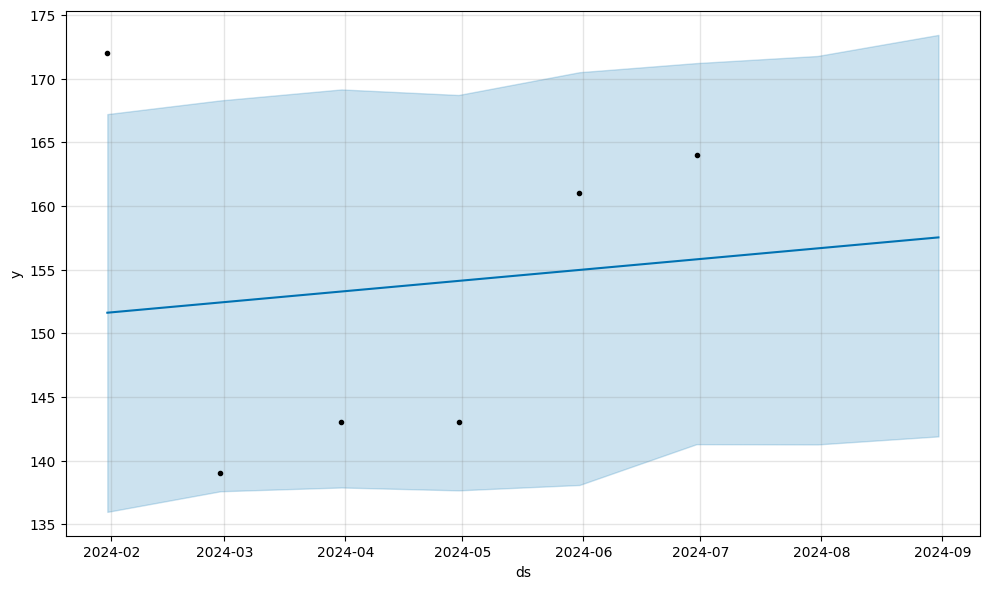

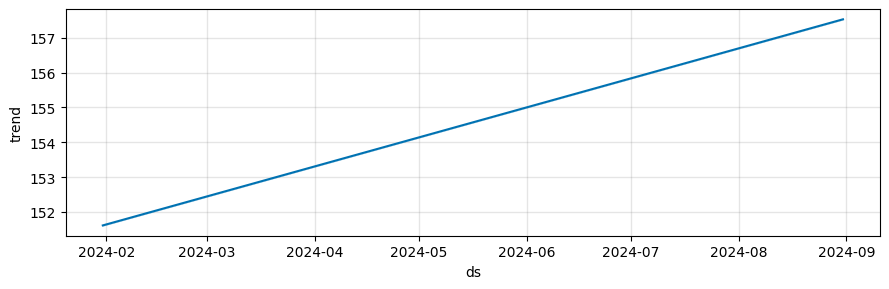

In [52]:
# Ahora, para evaluar solo en los datos de prueba
# Asegurarse de que `test_data` se alinee correctamente con las predicciones
forecast_test = forecast.tail(len(test_data))
r2_test = r2_score(test_data['Conteo'], forecast_test['yhat'])
print(f"Coeficiente de determinación (R^2) en el conjunto de prueba: {r2_test:.2f}")

# Graficar el pronóstico
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [53]:
# Mostrar las predicciones del modelo
print("Viajes estimados por mes con el modelo Prophet:")
print(forecast.tail(len(test_data))[['ds', 'yhat']].round(0))

Viajes estimados por mes con el modelo Prophet:
          ds   yhat
6 2024-07-31  157.0
7 2024-08-31  158.0


#Evaluacion del Modelo

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Alinear los datos de prueba y las predicciones
predictions_test = forecast.tail(len(test_data))['yhat']
true_values = test_data['Conteo']

# Calcular las métricas de evaluación
mae = mean_absolute_error(true_values, predictions_test)
rmse = np.sqrt(mean_squared_error(true_values, predictions_test))

print("\n")
print("="*60)
print("EVALUACIÓN DEL MODELO PROPHET")
print("="*60)
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")



EVALUACIÓN DEL MODELO PROPHET
Error Absoluto Medio (MAE): 5.40
Raíz del Error Cuadrático Medio (RMSE): 5.51


##Recomendaciones
Basado en la evaluación del modelo, aquí tienes algunas recomendaciones para su uso y potencial mejora:

Entiende el error de la predicción: El MAE te indica que, en promedio, tus predicciones se desvían de los valores reales en un margen de mae traslados. Este número te da una idea del nivel de confianza que puedes tener en las estimaciones.

Incorpora variables externas (Regresores): Si tienes acceso a datos adicionales que puedan influir en los traslados (como eventos especiales, días festivos, o incluso datos de clima), puedes agregarlos como regresores a Prophet para mejorar la precisión.

Ajusta los parámetros del modelo: Prophet tiene parámetros ajustables (changepoint_prior_scale, seasonality_prior_scale, etc.) que te permiten controlar la flexibilidad del modelo. Si el modelo subestima la variabilidad de los datos, puedes aumentar estos parámetros.

Monitorea el rendimiento a largo plazo: La precisión del modelo puede cambiar con el tiempo. Es recomendable reentrenar el modelo periódicamente con los datos más recientes para mantener su efectividad.

MAE de 5.40: Esto significa que, en promedio, las predicciones de tu modelo se desvían en 5.40 traslados del número real de traslados por mes. Si el conteo mensual de traslados es, por ejemplo, 150, un error de 5.40 es muy bajo y muestra una alta precisión. Si el conteo fuera solo 20, el error sería significativo.

RMSE de 5.51: Este valor es muy cercano al MAE, lo que indica que el modelo no comete errores de predicción particularmente grandes. Un RMSE muy superior al MAE sugiere que hay algunas predicciones con errores atípicos y muy grandes, pero en tu caso, los errores están bastante bien distribuidos.